In [1]:
import pandas as pd

df_train = pd.read_csv('data/train.csv').set_index('id')

df_train

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,2013-01-01,1,BABY CARE,0.000,0
2,2013-01-01,1,BEAUTY,0.000,0
3,2013-01-01,1,BEVERAGES,0.000,0
4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148


<Axes: xlabel='date'>

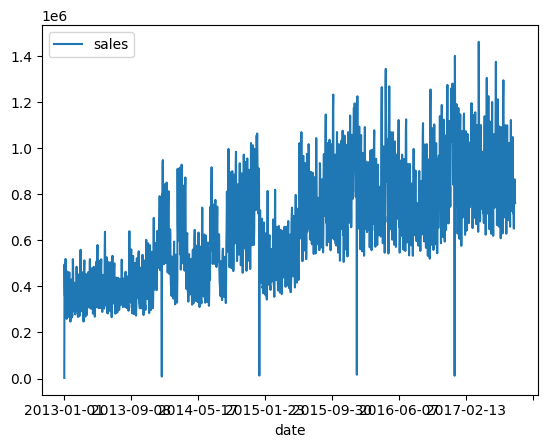

In [2]:
df_train.groupby('date').agg({'sales':'sum'}).plot()

<Axes: xlabel='store_nbr'>

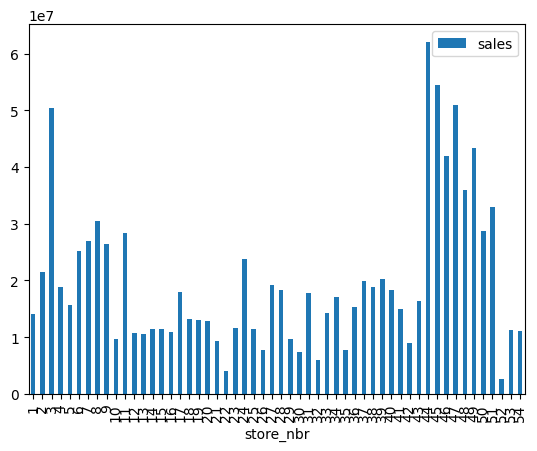

In [3]:
df_train.groupby('store_nbr').agg({'sales':'sum'}).plot(kind='bar')

In [4]:
df_txn = pd.read_csv('data/transactions.csv').set_index(['date','store_nbr'])

df_txn.head()

transactions
date       store_nbr              
2013-01-01 25                  770
2013-01-02 1                  2111
           2                  2358
           3                  3487
           4                  1922

<Axes: ylabel='Frequency'>

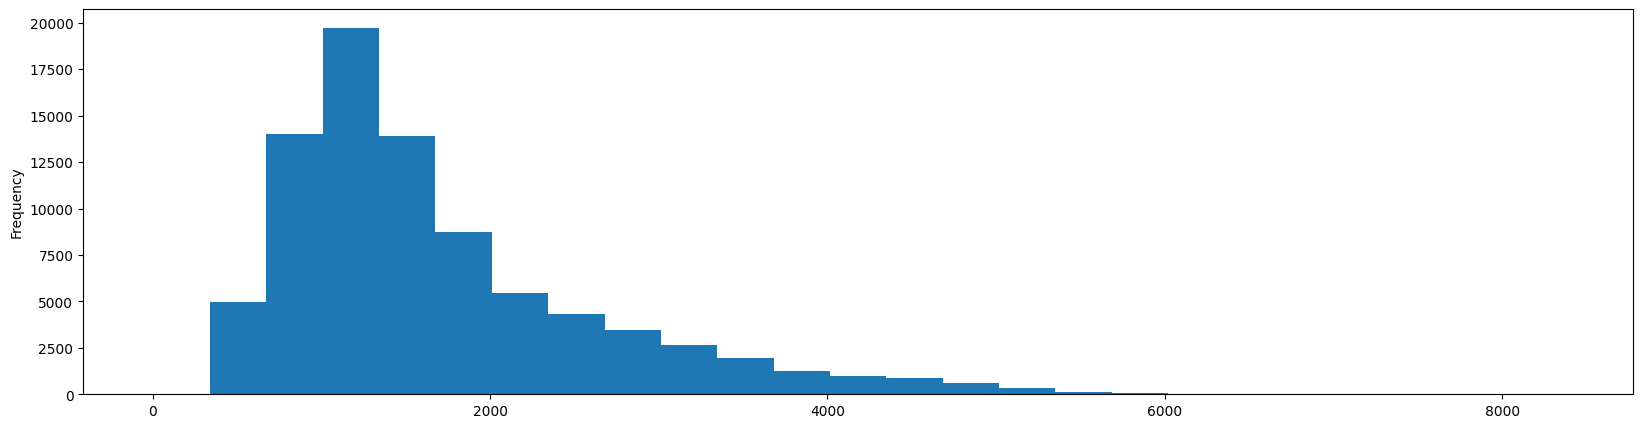

In [5]:
df_txn['transactions'].plot(kind='hist',figsize = (20,5),bins=25)

<Axes: xlabel='date'>

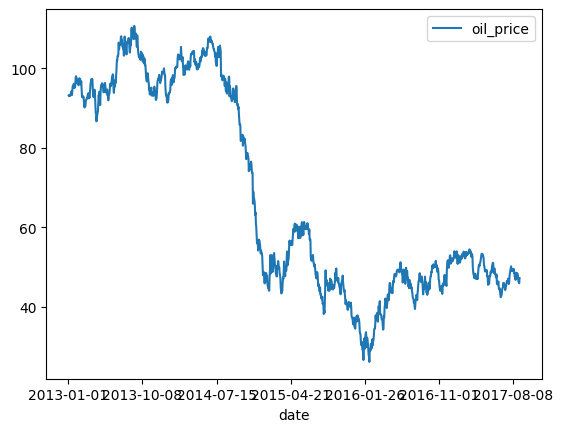

In [6]:
df_oil = pd.read_csv('data/oil.csv').set_index('date')

df_oil=df_oil.rename(columns = {'dcoilwtico':'oil_price'})

df_oil['oil_price']=df_oil['oil_price'].ffill()

df_oil.plot()

In [7]:
df_stores = pd.read_csv('data/stores.csv').set_index('store_nbr')

df_stores.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


<Axes: ylabel='city,state,type'>

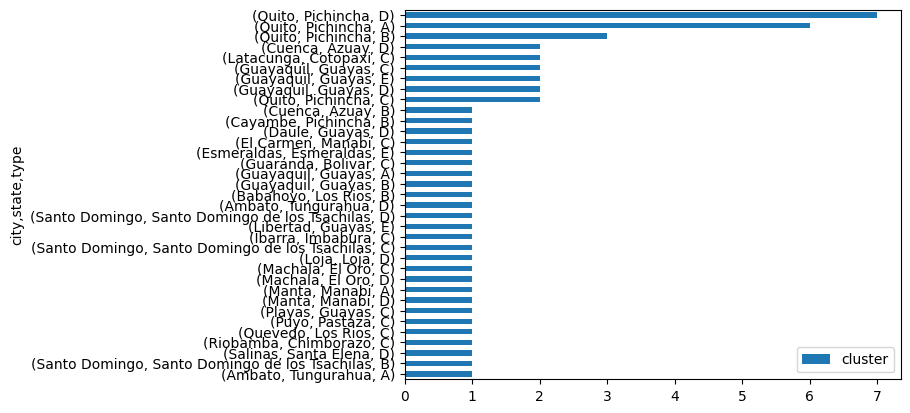

In [8]:
df_stores.groupby(['city','state','type']).count().sort_values('cluster').plot(kind='barh')

In [9]:
df_train = df_train.join(df_txn,on=['date','store_nbr'])

df_train = df_train.join(df_oil,on='date')

df_train=df_train.join(df_stores,on='store_nbr')

df_train.head()

,date,store_nbr,family,sales,onpromotion,transactions,oil_price,city,state,type,cluster
id,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13


In [10]:
df_temp = pd.read_csv('data/holidays_events.csv')
df_temp['is_transfer']=df_temp['type'].apply(lambda x: 1 if x == 'Transfer' else 0)


df_temp['transferred'] = df_temp['transferred'].astype(int)

df_localh=df_temp[df_temp['locale']=='Local'].copy()


In [11]:
df_localh

,date,type,locale,locale_name,description,transferred,is_transfer
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,0,0
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,0,0
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,0,0
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,0,0
5,2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,0,0
...,...,...,...,...,...,...,...
339,2017-12-05,Additional,Local,Quito,Fundacion de Quito-1,0,0
340,2017-12-06,Holiday,Local,Quito,Fundacion de Quito,1,0
341,2017-12-08,Holiday,Local,Loja,Fundacion de Loja,0,0
342,2017-12-08,Transfer,Local,Quito,Traslado Fundacion de Quito,0,1


In [12]:
df_temp = pd.read_csv('data/holidays_events.csv')
df_temp['is_transfer']=df_temp['type'].apply(lambda x: 1 if x == 'Transfer' else 0)


df_temp['transferred'] = df_temp['transferred'].astype(int)

df_localh=df_temp[df_temp['locale']=='Local'].copy()


df_localh['loc_hol']=True

df_localh=df_localh.rename(columns = {'locale_name':'city','transferred':'loc_transf','is_transfer':'loc_is_transf'})

df_localh=df_localh.set_index(['date','city'])


df_localh.head()

,,type,locale,description,loc_transf,loc_is_transf,loc_hol
date,city,,,,,,
2012-03-02,Manta,Holiday,Local,Fundacion de Manta,0,0,True
2012-04-12,Cuenca,Holiday,Local,Fundacion de Cuenca,0,0,True
2012-04-14,Libertad,Holiday,Local,Cantonizacion de Libertad,0,0,True
2012-04-21,Riobamba,Holiday,Local,Cantonizacion de Riobamba,0,0,True
2012-05-12,Puyo,Holiday,Local,Cantonizacion del Puyo,0,0,True


In [13]:
df_regh=df_temp[df_temp['locale']=='Regional'].copy()

df_regh['reg_hol']=True

df_regh=df_regh.rename(columns = {'locale_name':'state','transferred':'reg_transf','is_transfer':'reg_is_transf'})

df_regh=df_regh.set_index(['date','state'])



df_regh.head()

,,type,locale,description,reg_transf,reg_is_transf,reg_hol
date,state,,,,,,
2012-04-01,Cotopaxi,Holiday,Regional,Provincializacion de Cotopaxi,0,0,True
2012-06-25,Imbabura,Holiday,Regional,Provincializacion de Imbabura,0,0,True
2012-11-06,Santo Domingo de los Tsachilas,Holiday,Regional,Provincializacion de Santo Domingo,0,0,True
2012-11-07,Santa Elena,Holiday,Regional,Provincializacion Santa Elena,0,0,True
2013-04-01,Cotopaxi,Holiday,Regional,Provincializacion de Cotopaxi,0,0,True


In [14]:
df_nath=df_temp[df_temp['locale']=='National'].copy()

df_nath['nat_hol']=True

df_nath=df_nath.rename(columns = {'locale_name':'state','transferred':'nat_transf','is_transfer':'nat_is_transf'})

df_nath=df_nath.set_index('date')


df_nath.head()

,type,locale,state,description,nat_transf,nat_is_transf,nat_hol
date,,,,,,,
2012-08-10,Holiday,National,Ecuador,Primer Grito de Independencia,0,0,True
2012-10-09,Holiday,National,Ecuador,Independencia de Guayaquil,1,0,True
2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,0,1,True
2012-11-02,Holiday,National,Ecuador,Dia de Difuntos,0,0,True
2012-11-03,Holiday,National,Ecuador,Independencia de Cuenca,0,0,True


In [15]:
df_train=df_train.join(df_localh[['loc_transf','loc_is_transf','loc_hol']],on=['date','city'])

In [16]:
df_train=df_train.join(df_regh[['reg_transf','reg_is_transf','reg_hol']],on=['date','state'])

In [17]:
df_train=df_train.join(df_nath[['nat_transf','nat_is_transf','nat_hol']],on=['date'])

In [18]:
df_train.head()

,date,store_nbr,family,sales,onpromotion,transactions,oil_price,city,state,type,cluster,loc_transf,loc_is_transf,loc_hol,reg_transf,reg_is_transf,reg_hol,nat_transf,nat_is_transf,nat_hol
id,,,,,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True
1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True
2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True
3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True
4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,True


In [19]:
df_train['transfer_flag'] = df_train['loc_transf'].fillna(0)+df_train['nat_transf'].fillna(0)+df_train['reg_transf'].fillna(0)

df_train['transfer_flag']= df_train['transfer_flag'].apply(lambda x: True if x>0 else False)

df_train = df_train.drop(columns = ['loc_transf','nat_transf','reg_transf'])


df_train['is_transfer_flag'] = df_train['loc_is_transf'].fillna(0)+df_train['nat_is_transf'].fillna(0)+df_train['reg_is_transf'].fillna(0)

df_train['is_transfer_flag']= df_train['is_transfer_flag'].apply(lambda x: True if x>0 else False)

df_train = df_train.drop(columns = ['loc_is_transf','nat_is_transf','reg_is_transf'])


df_train.head()

,date,store_nbr,family,sales,onpromotion,transactions,oil_price,city,state,type,cluster,loc_hol,reg_hol,nat_hol,transfer_flag,is_transfer_flag
id,,,,,,,,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,True,False,False
1,2013-01-01,1,BABY CARE,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,True,False,False
2,2013-01-01,1,BEAUTY,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,True,False,False
3,2013-01-01,1,BEVERAGES,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,True,False,False
4,2013-01-01,1,BOOKS,0.0,0,NaN,NaN,Quito,Pichincha,D,13,NaN,NaN,True,False,False


In [20]:
df_train['loc_hol']=df_train['loc_hol'].fillna(False)
df_train['reg_hol']=df_train['reg_hol'].fillna(False)
df_train['nat_hol']=df_train['nat_hol'].fillna(False)

C:\Users\Nick\AppData\Local\Temp\ipykernel_16220\1644465758.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['loc_hol']=df_train['loc_hol'].fillna(False)
C:\Users\Nick\AppData\Local\Temp\ipykernel_16220\1644465758.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['reg_hol']=df_train['reg_hol'].fillna(False)
C:\Users\Nick\AppData\Local\Temp\ipykernel_16220\1644465758.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False)

In [22]:
df_train.to_csv('data/my_clean_data.csv')